# Support Vector Machines - SVM

# Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the 
dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in 
the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all 
patients here are females at least 21 years old of Pima Indian heritage.

# Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the 
number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

# 1. Import Libraries and load the dataset

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.metrics import confusion_matrix
from scipy.stats import skew
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Check dimension of dataset

In [52]:
data=pd.read_csv("Diabetes.csv")
data.shape
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# 3. Check distribution of dependent variable, Outcome and plot it

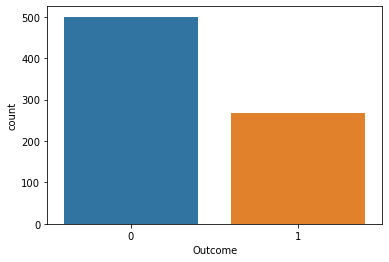

In [48]:
sns.countplot(x="Outcome",data=data)

# 4. Out of 768 data points, 500 are labeled as 0 and 268 as 1.
Outcome 0 means No diabetes, outcome 1 means diabetes, Give a countplot

In [49]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# 5. Check data distribution using summary statistics and provide your findings(Insights)

In [53]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [54]:
from sklearn.impute import SimpleImputer
SI=SimpleImputer(missing_values=0,strategy="mean")
data["Glucose"]=SI.fit_transform(data["Glucose"])

ValueError: Expected 2D array, got 1D array instead:
array=[148.  85. 183.  89. 137. 116.  78. 115. 197. 125. 110. 168. 139. 189.
 166. 100. 118. 107. 103. 115. 126.  99. 196. 119. 143. 125. 147.  97.
 145. 117. 109. 158.  88.  92. 122. 103. 138. 102.  90. 111. 180. 133.
 106. 171. 159. 180. 146.  71. 103. 105. 103. 101.  88. 176. 150.  73.
 187. 100. 146. 105.  84. 133.  44. 141. 114.  99. 109. 109.  95. 146.
 100. 139. 126. 129.  79.   0.  62.  95. 131. 112. 113.  74.  83. 101.
 137. 110. 106. 100. 136. 107.  80. 123.  81. 134. 142. 144.  92.  71.
  93. 122. 163. 151. 125.  81.  85. 126.  96. 144.  83.  95. 171. 155.
  89.  76. 160. 146. 124.  78.  97.  99. 162. 111. 107. 132. 113.  88.
 120. 118. 117. 105. 173. 122. 170.  84.  96. 125. 100.  93. 129. 105.
 128. 106. 108. 108. 154. 102.  57. 106. 147.  90. 136. 114. 156. 153.
 188. 152.  99. 109.  88. 163. 151. 102. 114. 100. 131. 104. 148. 120.
 110. 111. 102. 134.  87.  79.  75. 179.  85. 129. 143. 130.  87. 119.
   0.  73. 141. 194. 181. 128. 109. 139. 111. 123. 159. 135.  85. 158.
 105. 107. 109. 148. 113. 138. 108.  99. 103. 111. 196. 162.  96. 184.
  81. 147. 179. 140. 112. 151. 109. 125.  85. 112. 177. 158. 119. 142.
 100.  87. 101. 162. 197. 117. 142. 134.  79. 122.  74. 171. 181. 179.
 164. 104.  91.  91. 139. 119. 146. 184. 122. 165. 124. 111. 106. 129.
  90.  86.  92. 113. 111. 114. 193. 155. 191. 141.  95. 142. 123.  96.
 138. 128. 102. 146. 101. 108. 122.  71. 106. 100. 106. 104. 114. 108.
 146. 129. 133. 161. 108. 136. 155. 119.  96. 108.  78. 107. 128. 128.
 161. 151. 146. 126. 100. 112. 167. 144.  77. 115. 150. 120. 161. 137.
 128. 124.  80. 106. 155. 113. 109. 112.  99. 182. 115. 194. 129. 112.
 124. 152. 112. 157. 122. 179. 102. 105. 118.  87. 180. 106.  95. 165.
 117. 115. 152. 178. 130.  95.   0. 122.  95. 126. 139. 116.  99.   0.
  92. 137.  61.  90.  90. 165. 125. 129.  88. 196. 189. 158. 103. 146.
 147.  99. 124. 101.  81. 133. 173. 118.  84. 105. 122. 140.  98.  87.
 156.  93. 107. 105. 109.  90. 125. 119. 116. 105. 144. 100. 100. 166.
 131. 116. 158. 127.  96. 131.  82. 193.  95. 137. 136.  72. 168. 123.
 115. 101. 197. 172. 102. 112. 143. 143. 138. 173.  97. 144.  83. 129.
 119.  94. 102. 115. 151. 184.  94. 181. 135.  95.  99.  89.  80. 139.
  90. 141. 140. 147.  97. 107. 189.  83. 117. 108. 117. 180. 100.  95.
 104. 120.  82. 134.  91. 119. 100. 175. 135.  86. 148. 134. 120.  71.
  74.  88. 115. 124.  74.  97. 120. 154. 144. 137. 119. 136. 114. 137.
 105. 114. 126. 132. 158. 123.  85.  84. 145. 135. 139. 173.  99. 194.
  83.  89.  99. 125.  80. 166. 110.  81. 195. 154. 117.  84.   0.  94.
  96.  75. 180. 130.  84. 120.  84. 139.  91.  91.  99. 163. 145. 125.
  76. 129.  68. 124. 114. 130. 125.  87.  97. 116. 117. 111. 122. 107.
  86.  91.  77. 132. 105.  57. 127. 129. 100. 128.  90.  84.  88. 186.
 187. 131. 164. 189. 116.  84. 114.  88.  84. 124.  97. 110. 103.  85.
 125. 198.  87.  99.  91.  95.  99.  92. 154. 121.  78. 130. 111.  98.
 143. 119. 108. 118. 133. 197. 151. 109. 121. 100. 124.  93. 143. 103.
 176.  73. 111. 112. 132.  82. 123. 188.  67.  89. 173. 109. 108.  96.
 124. 150. 183. 124. 181.  92. 152. 111. 106. 174. 168. 105. 138. 106.
 117.  68. 112. 119. 112.  92. 183.  94. 108.  90. 125. 132. 128.  94.
 114. 102. 111. 128.  92. 104. 104.  94.  97. 100. 102. 128. 147.  90.
 103. 157. 167. 179. 136. 107.  91. 117. 123. 120. 106. 155. 101. 120.
 127.  80. 162. 199. 167. 145. 115. 112. 145. 111.  98. 154. 165.  99.
  68. 123.  91. 195. 156.  93. 121. 101.  56. 162.  95. 125. 136. 129.
 130. 107. 140. 144. 107. 158. 121. 129.  90. 142. 169.  99. 127. 118.
 122. 125. 168. 129. 110.  80. 115. 127. 164.  93. 158. 126. 129. 134.
 102. 187. 173.  94. 108.  97.  83. 114. 149. 117. 111. 112. 116. 141.
 175.  92. 130. 120. 174. 106. 105.  95. 126.  65.  99. 102. 120. 102.
 109. 140. 153. 100. 147.  81. 187. 162. 136. 121. 108. 181. 154. 128.
 137. 123. 106. 190.  88. 170.  89. 101. 122. 121. 126.  93.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [51]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

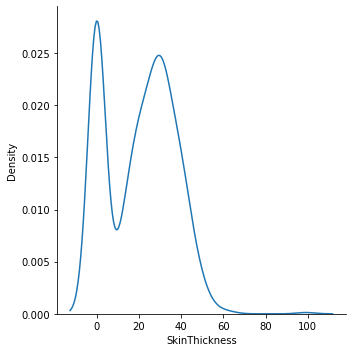

In [27]:
sns.displot(x="SkinThickness",data=data,kind="kde")

# 6. Do correlation analysis and bivariate viualization with Insights

# 7. Plot a scatter Matrix

# 8. Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable

# 9. Train Support Vector Machine Model

# 10. Scale the data points using MinMaxScaler

# 11. Fit SVM Model on Scale data and give your observation

# 12. Try improving the model accuracy using C=1000

# Here, increasing C allows us to improve the model, resulting in 81.2% train set accuracy.